In [15]:
import numpy as np
import scanpy as sc
import scipy
from scipy.sparse import csr_matrix
import scanpy.external as sce
import pandas as pd
import matplotlib.pyplot as plt
from composition_stats import clr
import anndata as ad
from muon import prot as pt

In [2]:
# from anndata import AnnData


# file_list = [
#      sc.read_h5ad('h5ads/lib_1.h5ad'), 
#      sc.read_h5ad('h5ads/lib_2.h5ad'), 
#      sc.read_h5ad('h5ads/lib_3.h5ad')
# ]
# [print(file) for file in file_list]
# #raise Error

# labels = 28291*["lib1"] +  29401* ["lib2"]+ 29546*["lib3"]
# new_l = []
# for adata in file_list:
#     # prep for hashsolo -- only with protein
#     #adata = over_input(adata, adata.var_names[-12:]) # this is always slow
#     # get hashsolo classsifications for each sample
#     #sce.pp.hashsolo(adata, list(adata.obs.columns)) 
#     #doublet_rate = adata.obs.Classification.value_counts()["Doublet"] / len(adata.obs.index)
#     #print(doublet_rate)
#     #print(adata.obs.Classification.value_counts())
#     # remove doublets and negatives
#     #cleaned_df = adata[~adata.obs['Classification'].isin(['Doublet', 'Negative'])]
#     # apply thaw map
#     #adata.obs["Thaw"] = adata.obs['Classification'].map(hashtag_to_thaw)
#     new_l.append(adata)
    
# [print(file) for file in new_l]
# pbmc_concat = ad.concat(new_l, merge="same")
# pbmc_concat.obs["batch"] = labels
# pbmc_concat

AnnData object with n_obs × n_vars = 28291 × 36750
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 29401 × 36750
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 29546 × 36750
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 28291 × 36750
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 29401 × 36750
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 29546 × 36750
    var: 'gene_ids', 'feature_types'


/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 87238 × 36750
    obs: 'batch'
    var: 'gene_ids', 'feature_types'

In [3]:
# rna = pbmc_concat[:, pbmc_concat.var[:-149].index].copy() # make sure they are no longer connected
# protein = pbmc_concat[:, pbmc_concat.var[-149:].index].copy()
# # qc first for each sample
# # rna qc
# # rna = rna_qc_filter(rna)
# # # protein qc
# # protein = protein_qc_filter(protein)
# #print(rna.var.feature_types)#.uns['log1p']) # maybe just have multiple layers??
# #print(protein.var.feature_types)#.uns['log1p'])
# # now save each separately
# rna.write_h5ad('h5ads/full_rna_after_qc.h5ad')
# protein.write_h5ad('h5ads/full_protein_after_qc.h5ad')

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
# rna_prot = [sc.read_h5ad("h5ads/full_rna_after_qc.h5ad"),  
#             sc.read_h5ad("h5ads/full_protein_after_qc.h5ad")]

# for i in range(len(rna_prot)):
#     # add batch labels
#     rna_prot[i].obs["batch"] = labels
#     rna_prot[i].obs_names_make_unique()
#     # elim all 0 zero count features
#     sc.pp.filter_genes(rna_prot[i], min_counts=1)
#     # protein qc
#     if i == 1:
#         # normalization described in cite seq paper
#         pt.pp.clr(rna_prot[i])
#     # rna qc
#     else:
#         # remove mitochondrial genes -- normal in scRNAseq 
#         rna_prot[i].var["mito"] = rna_prot[i].var_names.str.startswith("MT-")
#         sc.pp.calculate_qc_metrics(rna_prot[i], qc_vars=["mito"], inplace=True)
#         rna_prot[i].layers["counts"] = rna_prot[i].X.copy()
#         # normalize according to paper
#         sc.pp.normalize_total(rna_prot[i])
#     # either modality need last normalization step
#     sc.pp.log1p(rna_prot[i])
#     # basic dim reduction for each modality
#     sc.pp.pca(rna_prot[i])
#     # batch correction
#     sce.pp.harmony_integrate(rna_prot[i], 'batch') #
#     # needs to be done for wnn step anyway
#     sc.pp.neighbors(rna_prot[i])

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2023-06-22 14:01:21,116 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-06-22 14:01:56,487 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-06-22 14:01:56,955 - harmonypy - INFO - Iteration 1 of 10
2023-06-22 14:02:41,243 - harmonypy - INFO - Iteration 2 of 10
2023-06-22 14:03:22,971 - harmonypy - INFO - Iteration 3 of 10
2023-06-22 14:04:00,673 - harmonypy - INFO - Iteration 4 of 10
2023-06-22 14:04:39,084 - harmonypy - INFO - Iteration 5 of 10
2023-06-22 14:05:21,943 - harmonypy - INFO - Iteration 6 of 

In [23]:
rna_prot = [sc.read_h5ad("h5ads/correct_rna.h5ad"),  
            sc.read_h5ad("h5ads/correct_protein.h5ad")]

In [17]:
rna_prot[0], rna_prot[1] # null return, it is an inplace op

(AnnData object with n_obs × n_vars = 47024 × 28608
     obs: 'TotalSeq-C0251 anti-human Hashtag 1 Antibody', 'TotalSeq-C0252 anti-human Hashtag 2 Antibody', 'TotalSeq-C0253 anti-human Hashtag 3 Antibody', 'TotalSeq-C0254 anti-human Hashtag 4 Antibody', 'TotalSeq-C0255 anti-human Hashtag 5 Antibody', 'TotalSeq-C0256 anti-human Hashtag 6 Antibody', 'TotalSeq-C0257 anti-human Hashtag 7 Antibody', 'TotalSeq-C0258 anti-human Hashtag 8 Antibody', 'TotalSeq-C0259 anti-human Hashtag 9 Antibody', 'TotalSeq-C0260 anti-human Hashtag 10 Antibody', 'TotalSeq-C0262 anti-human Hashtag 12 Antibody', 'TotalSeq-C0263 anti-human Hashtag 13 Antibody', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'Thaw', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
     var: 'gene_ids', 'featu

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


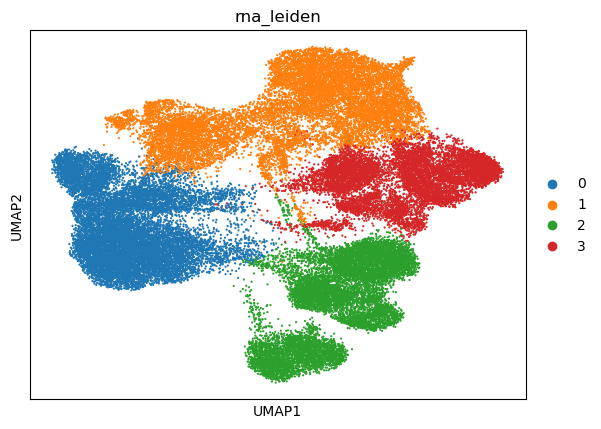

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


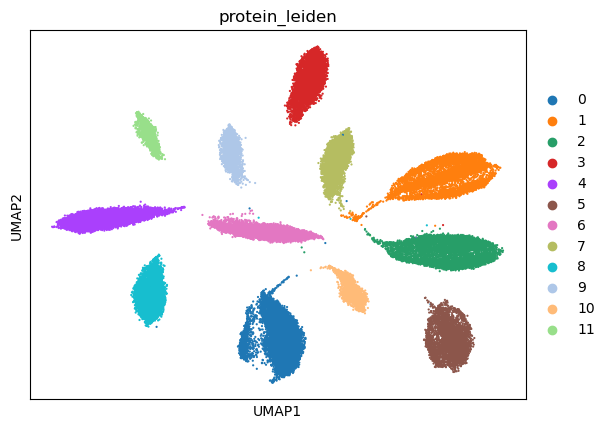

In [24]:
names = ["rna", "protein"]

for i in range(len(rna_prot)):
    sc.tl.umap(rna_prot[i])
    sc.tl.leiden(rna_prot[i], key_added=names[i]+"_leiden", resolution=0.1)
    sc.pl.umap(rna_prot[i], color=names[i]+"_leiden", size=10)

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


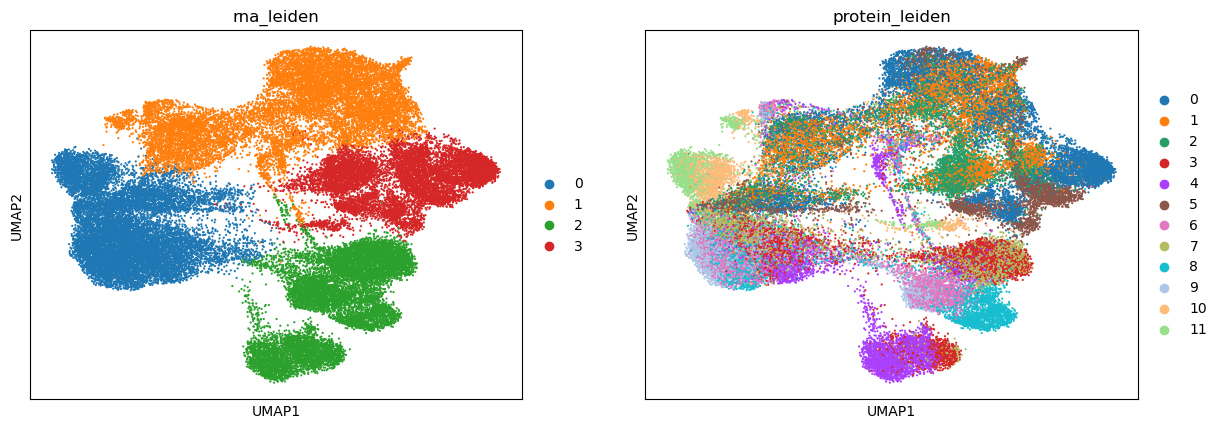

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


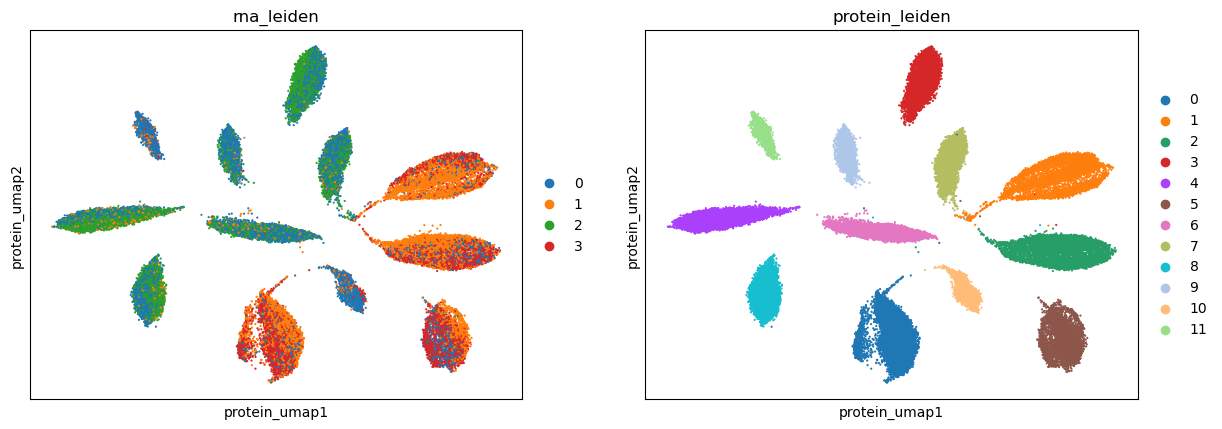

In [25]:
rna, protein = rna_prot

# If you want to show the difference in individual modality clustering
rna.obsm["protein"] = protein.to_df()
rna.obsm["protein_umap"] = protein.obsm["X_umap"]
rna.obs["protein_leiden"] = protein.obs["protein_leiden"]
rna.obsp["rna_connectivities"] = rna.obsp["connectivities"].copy()
protein.obsp["protein_connectivities"] = protein.obsp["connectivities"].copy()
rna.obsp["protein_connectivities"] = protein.obsp["protein_connectivities"]
sc.tl.umap(rna)
sc.pl.umap(rna, color=["rna_leiden", "protein_leiden"], size=10)
sc.pl.embedding(rna, basis="protein_umap", color=["rna_leiden", "protein_leiden"], size=10)

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:348: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:358: NumbaWarning: Cannot cache compiled function "process_candidates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  nn_descent_internal_low_memory_parallel(
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses

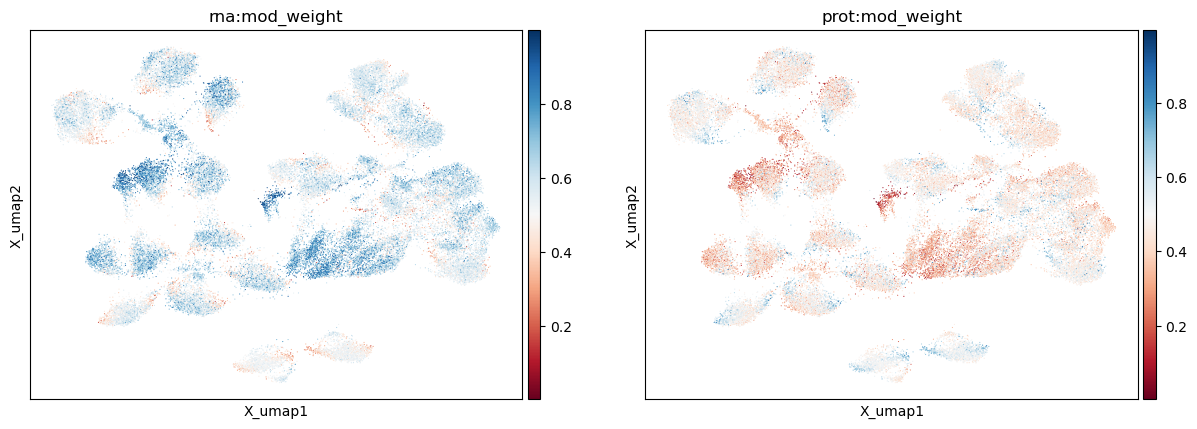

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


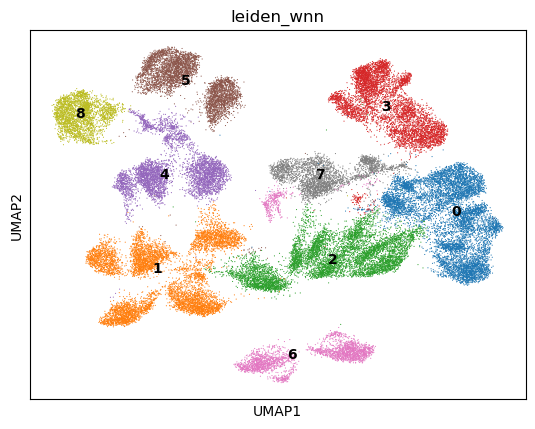

In [26]:
import muon as mu 

mdata = mu.MuData({'rna': rna_prot[0], 'prot': rna_prot[1]})
# Calculate weighted nearest neighbors
mu.pp.neighbors(mdata, key_added='wnn')
mu.tl.umap(mdata, neighbors_key='wnn', random_state=10)
mu.pl.umap(mdata, color=['rna:mod_weight', 'prot:mod_weight'], cmap='RdBu')
# actual joint clustering?
sc.tl.leiden(mdata, resolution=0.1, neighbors_key='wnn', key_added='leiden_wnn') # 0.1 makes fewer clusters
sc.pl.umap(mdata, color='leiden_wnn', legend_loc='on data')

In [28]:
rna_prot[0],rna_prot[1]

(AnnData object with n_obs × n_vars = 47024 × 28608
     obs: 'TotalSeq-C0251 anti-human Hashtag 1 Antibody', 'TotalSeq-C0252 anti-human Hashtag 2 Antibody', 'TotalSeq-C0253 anti-human Hashtag 3 Antibody', 'TotalSeq-C0254 anti-human Hashtag 4 Antibody', 'TotalSeq-C0255 anti-human Hashtag 5 Antibody', 'TotalSeq-C0256 anti-human Hashtag 6 Antibody', 'TotalSeq-C0257 anti-human Hashtag 7 Antibody', 'TotalSeq-C0258 anti-human Hashtag 8 Antibody', 'TotalSeq-C0259 anti-human Hashtag 9 Antibody', 'TotalSeq-C0260 anti-human Hashtag 10 Antibody', 'TotalSeq-C0262 anti-human Hashtag 12 Antibody', 'TotalSeq-C0263 anti-human Hashtag 13 Antibody', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'Thaw', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'rna_leiden', 'protein_leid

In [40]:
#rna.uns
rna.uns['log1p']["base"] = None#.log1p
prot.uns['log1p']["base"] = None
prot = prot[:, prot.var_names[:-12]]

View of AnnData object with n_obs × n_vars = 47024 × 137
    obs: 'TotalSeq-C0251 anti-human Hashtag 1 Antibody', 'TotalSeq-C0252 anti-human Hashtag 2 Antibody', 'TotalSeq-C0253 anti-human Hashtag 3 Antibody', 'TotalSeq-C0254 anti-human Hashtag 4 Antibody', 'TotalSeq-C0255 anti-human Hashtag 5 Antibody', 'TotalSeq-C0256 anti-human Hashtag 6 Antibody', 'TotalSeq-C0257 anti-human Hashtag 7 Antibody', 'TotalSeq-C0258 anti-human Hashtag 8 Antibody', 'TotalSeq-C0259 anti-human Hashtag 9 Antibody', 'TotalSeq-C0260 anti-human Hashtag 10 Antibody', 'TotalSeq-C0262 anti-human Hashtag 12 Antibody', 'TotalSeq-C0263 anti-human Hashtag 13 Antibody', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'Thaw', 'batch', 'protein_leiden', 'labels'
    var: 'gene_ids', 'feature_types', 'n_counts'
    uns: 'log1p', 'neighbors', 'pca', 'umap', 'leiden', 'protein_leiden_colors', 'wilcoxon'
    

/tmp/ipykernel_3283228/4020320528.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  prot.obs["labels"] = labels


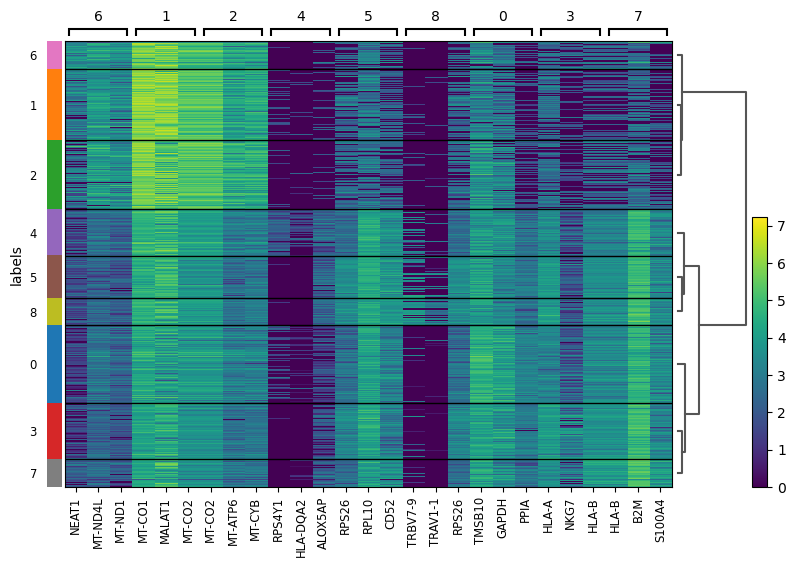

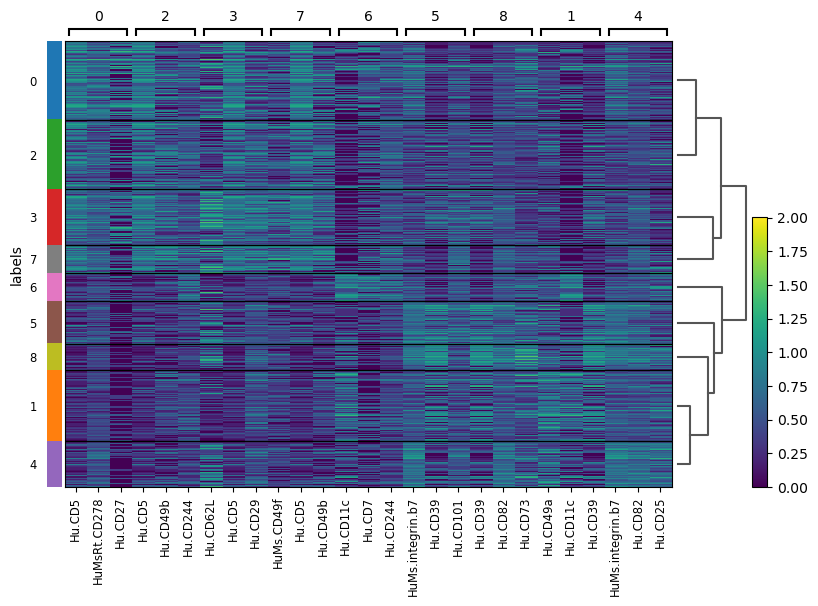

In [42]:
# actual ranking stuff

labels = mdata.obs["leiden_wnn"] # here are the labels
rna = mdata["rna"] # normalized RNA counts
prot = mdata["prot"]
prot = prot[:, prot.var_names[:-12]] # this might need to be done earlier?
rna.obs["labels"] = labels
prot.obs["labels"] = labels
sc.tl.rank_genes_groups(rna, 'labels', method='wilcoxon', key_added = "wilcoxon") # wilcoxon rank sum, 'benjamini-hochberg' correction
# get top 3 genes
sc.pl.rank_genes_groups_heatmap(rna, n_genes=3, key="wilcoxon", groupby="labels", show_gene_labels=True)
# get top 3 prots
sc.tl.rank_genes_groups(prot, 'labels', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups_heatmap(prot, n_genes=3, key="wilcoxon", groupby="labels", show_gene_labels=True)